# Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

import statsmodels.api as sms
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("data/df_clean.csv")
df.head()

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_l_price
0,0,141013,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0.0,1955,141013,98178,47.5112,-122.257,1340,5650,188.05
1,1,141209,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400.0,1951,141209,98125,47.7210,-122.319,1690,7639,209.34
2,2,150225,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0.0,1933,150225,98028,47.7379,-122.233,2720,8062,233.77
3,3,141209,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910.0,1965,141209,98136,47.5208,-122.393,1360,5000,308.16
4,4,150218,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0.0,1987,150218,98074,47.6168,-122.045,1800,7503,303.57


In [3]:
# drop columns
df.drop("Unnamed: 0", inplace=True, axis=1)
df.drop("date", inplace=True, axis=1)

In [4]:
round(df.describe(),2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_l_price
count,21597.00,21595.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,285.72,1971.00,143902.70,98077.95,47.56,-122.21,1986.62,12758.28,264.14
std,367368.14,0.90,0.77,918.11,41412.64,0.54,0.08,0.76,0.65,1.17,827.76,439.82,29.38,4436.65,53.51,0.14,0.14,685.23,27274.44,110.00
min,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,1900.00,140502.00,98001.00,47.16,-122.52,399.00,651.00,87.59
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,140722.00,98033.00,47.47,-122.33,1490.00,5100.00,182.29
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,141016.00,98065.00,47.57,-122.23,1840.00,7620.00,244.64
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,550.00,1997.00,150217.00,98118.00,47.68,-122.12,2360.00,10083.00,318.33
max,7700000.00,10.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,150527.00,98199.00,47.78,-121.32,6210.00,871200.00,810.14


## Plots to categorise features

In [5]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_l_price'],
      dtype='object')

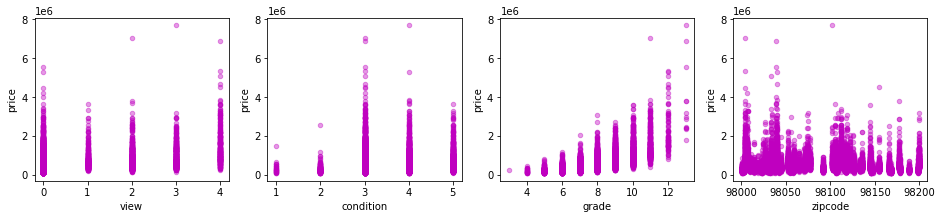

In [6]:
#categorial features1
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['view', 'condition', 'grade', 'zipcode'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='m')
    
plt.savefig('figures/categorial-features1.png')

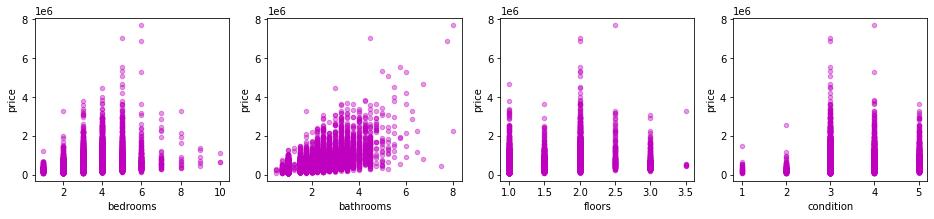

In [7]:
#categorial features2
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'floors', 'condition'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='m')
    
plt.savefig('figures/categorial-features2.png')

In [8]:
categorical_var = ["waterfront",
                   "condition",
                   "grade",
                   "zipcode",
                   'bedrooms',
                   'bathrooms',
                   'floors',
                   'view']

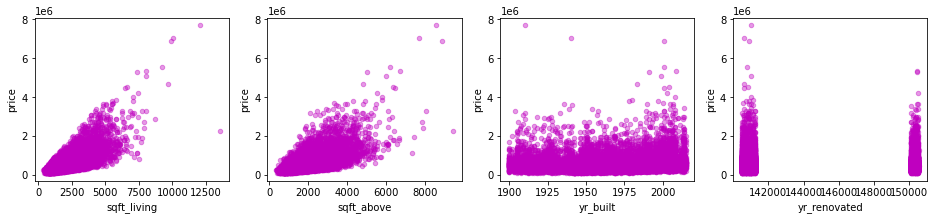

In [9]:
#contineus var1
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'sqft_above', 'yr_built', 'yr_renovated'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='m')
    
plt.savefig('figures/continues-feature1.png')

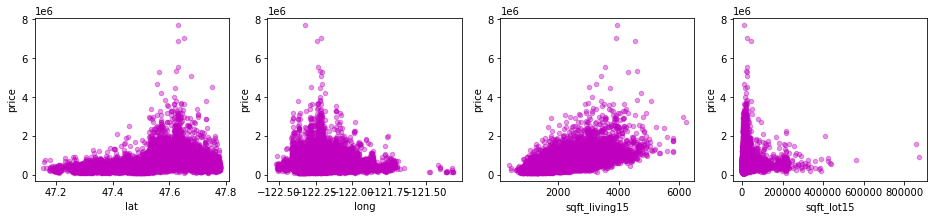

In [10]:
#contineus var2
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['lat', 'long', 'sqft_living15', 'sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='m')
    
plt.savefig('figures/continues-feature2.png')

In [11]:
continuous_var = ['price',
                  'sqft_living',
                  'sqft_lot',
                  'sqft_above',
                  'sqft_basement',
                  'yr_built',
                  'yr_renovated',
                  'lat',
                  'long',
                  'sqft_living15',
                  'sqft_lot15',
                  "sqft_l_price"]

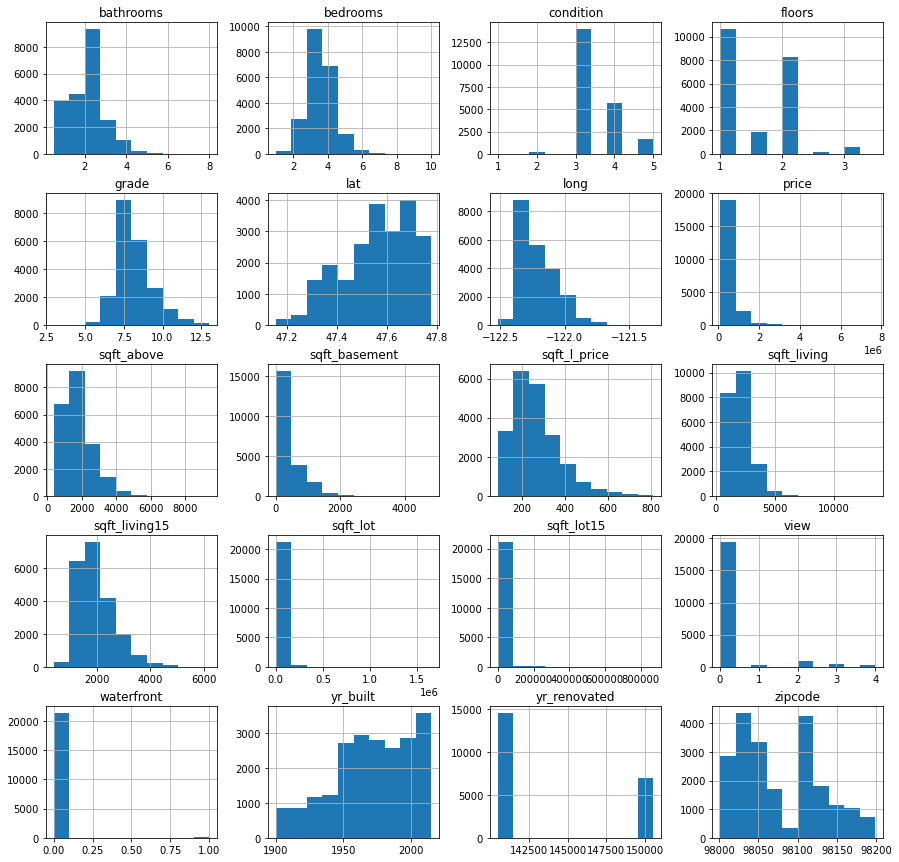

In [12]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax);

## Correlogram

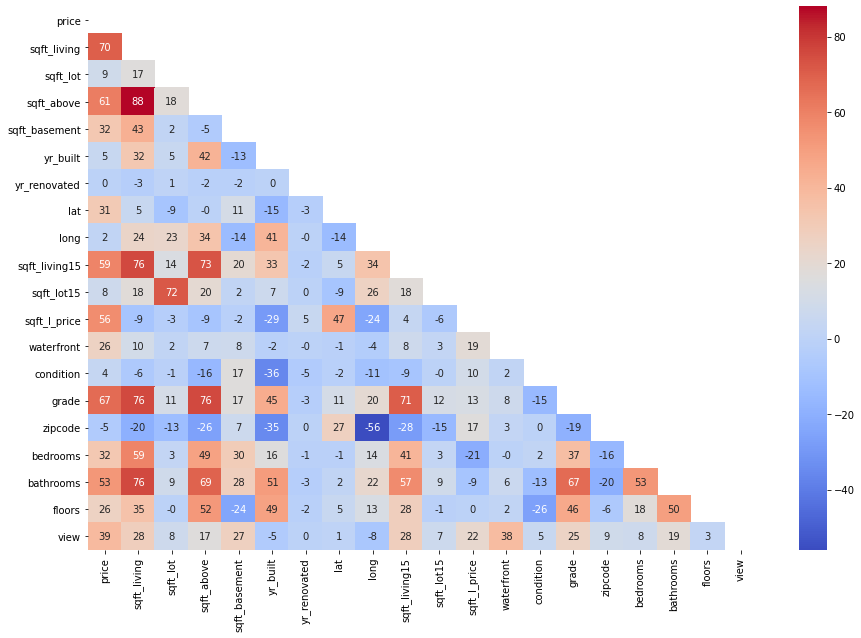

In [13]:
fig, ax = plt.subplots(figsize=(15,10))


df_dum = pd.get_dummies(df[continuous_var+categorical_var].copy())
mask = np.triu(df_dum.corr())
ax = sns.heatmap(round(df_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap="coolwarm")
                 
plt.savefig('figures/correlogram.png')

## Get dummies

In [14]:
categorical_var

['waterfront',
 'condition',
 'grade',
 'zipcode',
 'bedrooms',
 'bathrooms',
 'floors',
 'view']

In [15]:
df[categorical_var] = df[categorical_var].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
price            21597 non-null float64
bedrooms         21597 non-null object
bathrooms        21597 non-null object
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null object
waterfront       21597 non-null object
view             21597 non-null object
condition        21597 non-null object
grade            21597 non-null object
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
sqft_l_price     21597 non-null float64
dtypes: float64(5), int64(7), object(8)
memory usage: 3.3+ MB


In [16]:
X = pd.get_dummies(df.copy(), drop_first=True)

X.drop("price",        axis=1, inplace=True)
X.drop("sqft_l_price", axis=1, inplace=True)

y = df["price"]

## Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

## Linear regression model

### Sklearn LinearRegression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_predictions = lin_reg.predict(X_test)

In [19]:
print(f"RMSE: {round(mean_squared_error(y_test, y_predictions)**0.5,3)} Dollar")
print(f"RMSE:     {round((mean_squared_error(y_test, y_predictions)**0.5)/np.mean(y_test)*100,2)} %")
print(f"R2:       {round(r2_score(y_test, y_predictions)*100,3)}%")

RMSE: 138170.908 Dollar
RMSE:     25.9 %
R2:       83.782%


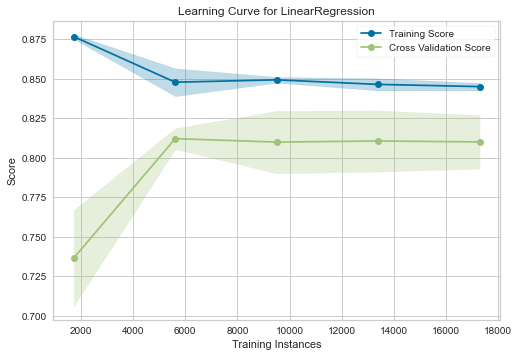

<AxesSubplot:title={'center':'Learning Curve for LinearRegression'}, xlabel='Training Instances', ylabel='Score'>

In [21]:
from yellowbrick.model_selection import LearningCurve

model = LinearRegression()
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)
visualizer.show()

### Lasso Regression

In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [23]:
lasso = Lasso()
parameters = {"alpha": [1e-10,1e-5,1e-2,1,5,10,20,30,40,50,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring="neg_mean_squared_error", cv=5)

In [24]:
lasso_regressor.fit(X_train, y_train)
y_predictions_lasso = lasso_regressor.predict(X_test)

In [25]:
print(lasso_regressor.best_params_)
print(round(lasso_regressor.best_score_,2))
print(f"LassoReg RMSE: {np.round(mean_squared_error(y_test, y_predictions_lasso)**.5,2)}")
print(f"LassoReg RMSE:     {round((mean_squared_error(y_test, y_predictions_lasso)**0.5)/np.mean(y_test)*100,2)} %")
print(f"LassoReg R2:       {round(r2_score(y_test, y_predictions_lasso),3)*100} %")  

{'alpha': 100}
-24723722953.96
LassoReg RMSE: 137275.12
LassoReg RMSE:     25.73 %
LassoReg R2:       84.0 %


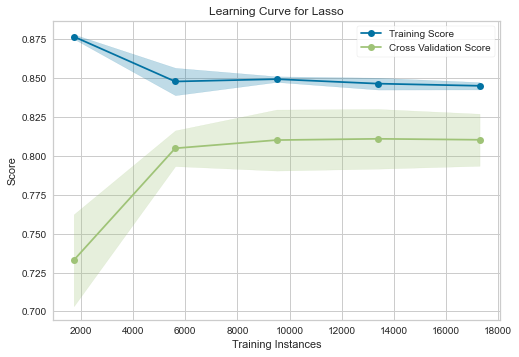

<AxesSubplot:title={'center':'Learning Curve for Lasso'}, xlabel='Training Instances', ylabel='Score'>

In [26]:
from yellowbrick.model_selection import LearningCurve

model = Lasso()
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)
visualizer.show()  

### Statsmodel OLS

In [27]:
X_train = sms.add_constant(X_train)

model = sms.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     654.4
Date:                Sun, 27 Sep 2020   Prob (F-statistic):               0.00
Time:                        20:28:02   Log-Likelihood:            -2.3021e+05
No. Observations:               17277   AIC:                         4.607e+05
Df Residuals:                   17136   BIC:                         4.618e+05
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.621e+07   6.37e+06     -5.688      0.000   -4.87e+07   -2.37e+07
sqft_living      109.2064     14.513      7.525      0.000      80.760     137.653
sqft_lot           0.2082      0.041      5.114      0.000       0.128       0.288
sqft_above        47.4047     14.602      3.247      0.001      18.784      76.025
sqft_basement      4.7848     14.370      0.333      0.739     -23.381      32.951
yr_built        -322.1806     69.683     -4.624      0.000    -458.767    -185.594
yr_renovated       3.2365      0.257     12.595      0.000       2.733       3.740
lat             1.961e+05   6.53e+04      3.003      0.003    6.81e+04    3.24e+05
long           -2.217e+05   4.73e+04     -4.690      0.000   -3.14e+05   -1.29e+05
sqft_living15     19.5109      3.043      6.411      0.000      13.546      25.476
sqft_lot15        -0.1920      0.062     -3.098      0.002      -0.313      -0.071
bedrooms_10.0  -3.047e+05   8.86e+04     -3.439      0.001   -4.78e+05   -1.31e+05
bedrooms_2.0    5351.5721    1.3e+04      0.410      0.682   -2.02e+04    3.09e+04
bedrooms_3.0    1.454e+04   1.31e+04      1.112      0.266   -1.11e+04    4.02e+04
bedrooms_4.0     -81.9031   1.34e+04     -0.006      0.995   -2.63e+04    2.61e+04
bedrooms_5.0   -1.876e+04    1.4e+04     -1.337      0.181   -4.63e+04    8751.020
bedrooms_6.0   -4.634e+04   1.68e+04     -2.754      0.006   -7.93e+04   -1.34e+04
bedrooms_7.0   -2.231e+05   3.11e+04     -7.173      0.000   -2.84e+05   -1.62e+05
bedrooms_8.0   -3.062e+04   4.81e+04     -0.636      0.524   -1.25e+05    6.37e+04
bedrooms_9.0   -1.338e+05   7.66e+04     -1.747      0.081   -2.84e+05    1.63e+04
bedrooms_nan    4.864e+04    1.5e+05      0.325      0.745   -2.44e+05    3.42e+05
bathrooms_0.75 -1.195e+04   7.75e+04     -0.154      0.878   -1.64e+05     1.4e+05
bathrooms_1.0   3.123e+04   7.46e+04      0.419      0.676   -1.15e+05    1.78e+05
bathrooms_1.25 -3.586e+04   9.14e+04     -0.392      0.695   -2.15e+05    1.43e+05
bathrooms_1.5   2.561e+04   7.48e+04      0.343      0.732   -1.21e+05    1.72e+05
bathrooms_1.75  2.459e+04   7.47e+04      0.329      0.742   -1.22e+05    1.71e+05
bathrooms_2.0    2.47e+04   7.47e+04      0.331      0.741   -1.22e+05    1.71e+05
bathrooms_2.25   4.13e+04   7.48e+04      0.552      0.581   -1.05e+05    1.88e+05
bathrooms_2.5   2.965e+04   7.47e+04      0.397      0.692   -1.17e+05    1.76e+05
bathrooms_2.75  3.334e+04   7.49e+04      0.445      0.656   -1.13e+05     1.8e+05
bathrooms_3.0    4.93e+04    7.5e+04      0.658      0.511   -9.76e+04    1.96e+05
bathrooms_3.25  9.867e+04   7.51e+04      1.314      0.189   -4.85e+04    2.46e+05
bathrooms_3.5   5.383e+04   7.51e+04      0.717      0.473   -9.33e+04    2.01e+05
bathrooms_3.75    1.3e+05    7.6e+04      1.711      0.087    -1.9e+04    2.79e+05
bathrooms_4.